# Add 10% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')


--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 10)

Outliers found:


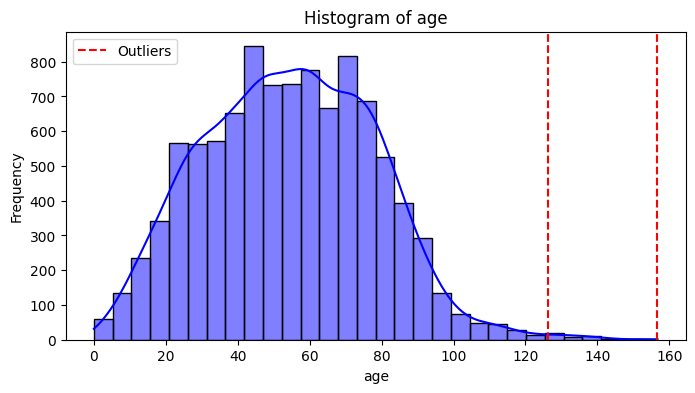

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1541
           1       0.83      0.92      0.87      1455

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Node Labels:
 Annotation(0.584937, 0.954545, 'avg_glucose_level <= 167.285\nsamples = 6988\nvalue = [3474.0, 3514.0]\nclass = 1')


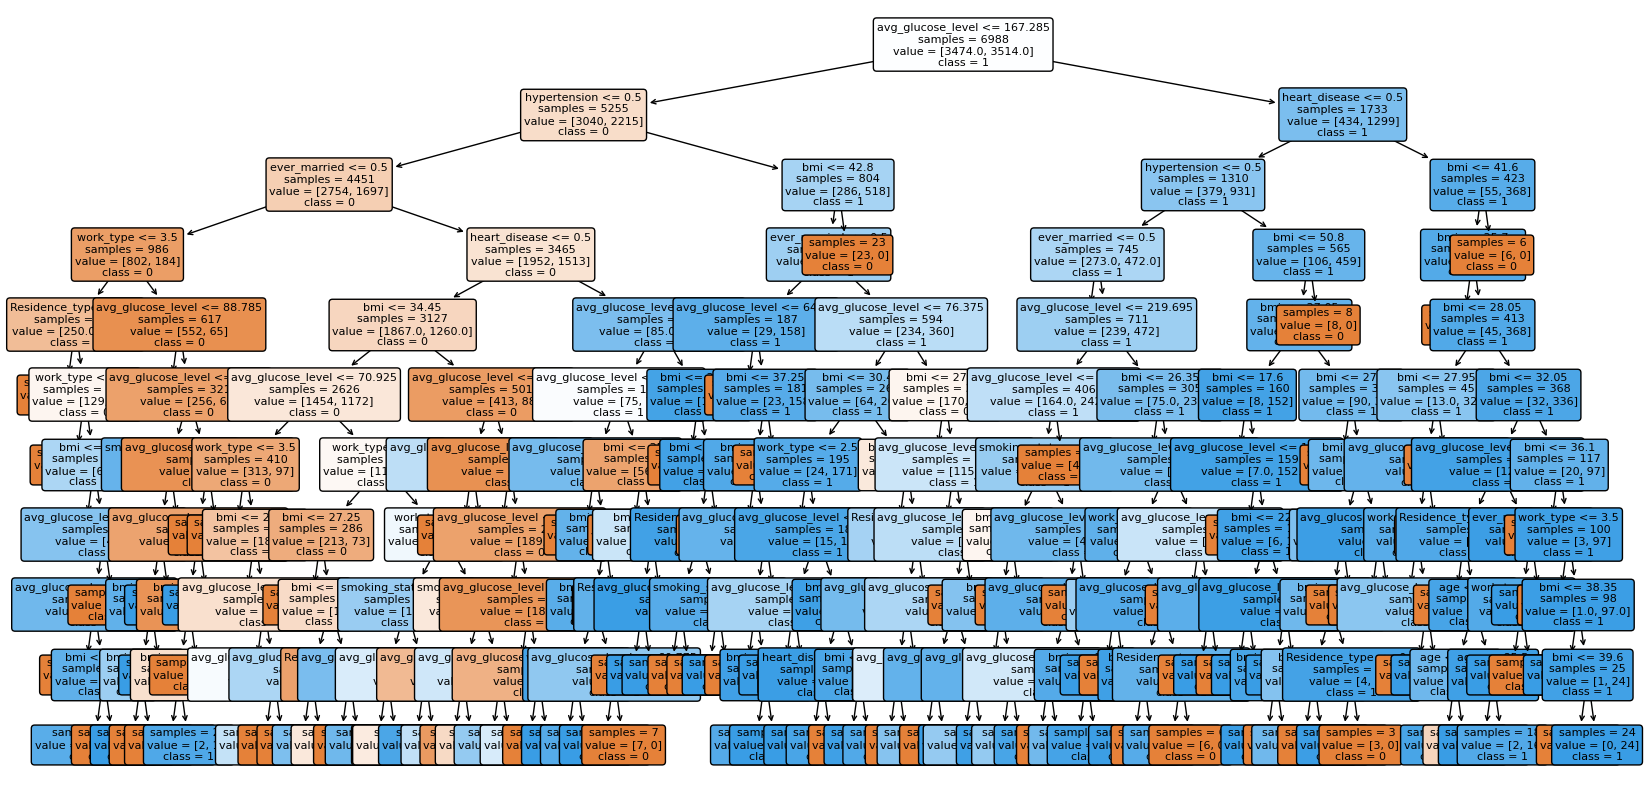

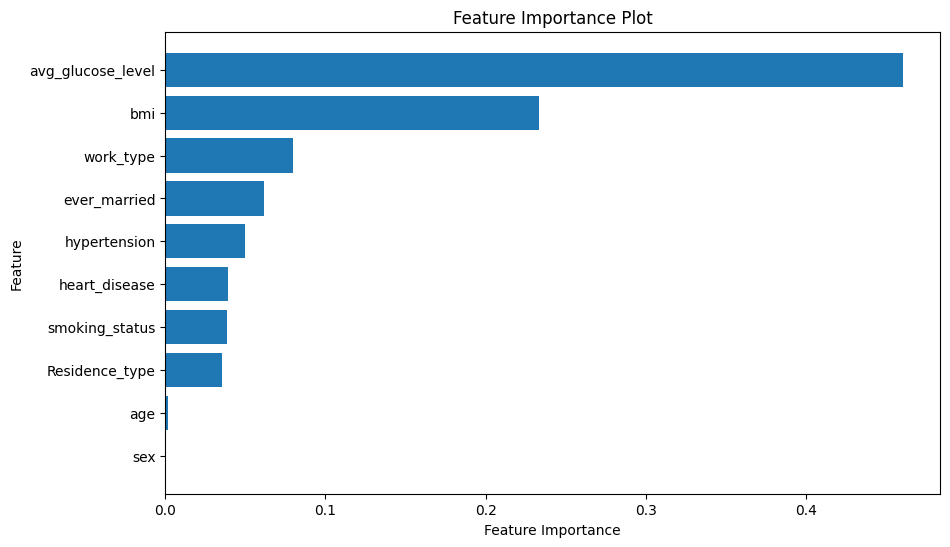

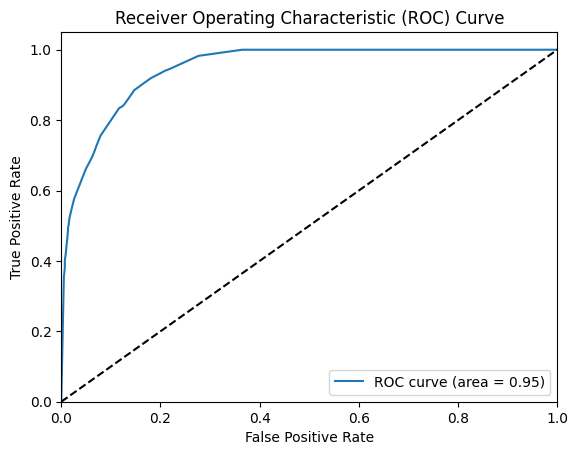

AUC Score: 0.9467226842033668


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7766666666666666, 0.78, 0.8166666666666667, 0.82, 0.85, 0.8233333333333334, 0.7959866220735786, 0.8160535117056856, 0.8394648829431438, 0.7993311036789298]
Mean accuracy: 0.8117502787068004
95% confidence interval: (0.7946918153049706, 0.8288087421086302)


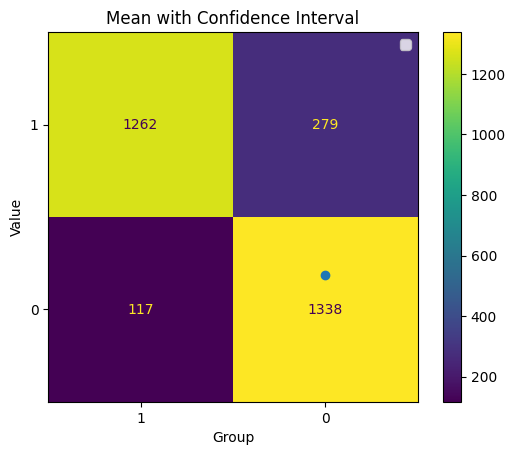

In [6]:
y_pred_prob_age_dt, y_test_age_dt, decision_tree = ML_algorithms.model_dt(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)


**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



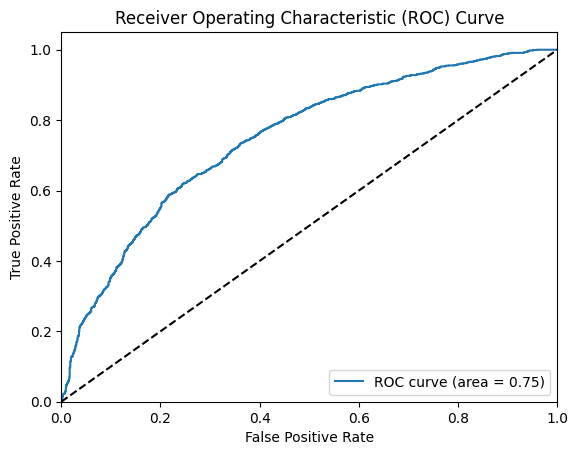

AUC Score: 0.7482346224948766


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6666666666666666, 0.6733333333333333, 0.68, 0.6266666666666667, 0.6833333333333333, 0.6166666666666667, 0.705685618729097, 0.6655518394648829, 0.6722408026755853, 0.705685618729097]
Mean accuracy: 0.6695830546265329
95% confidence interval: (0.6488059105662852, 0.6903601986867806)


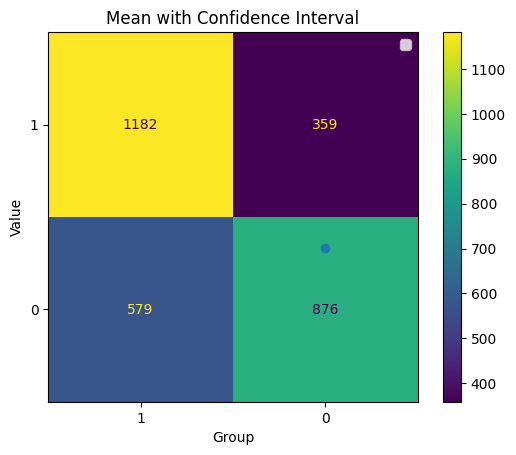

In [7]:
y_pred_prob_age_svm, y_test_age_svm, svm = ML_algorithms.model_svm(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

Outliers found:


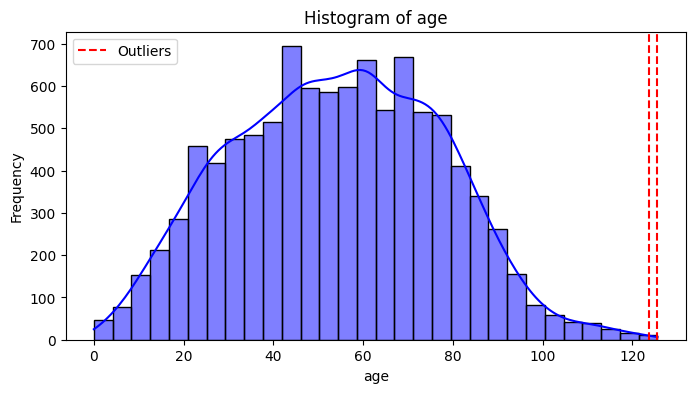

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1541
           1       0.83      0.92      0.87      1455

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Node Labels:
 Annotation(0.584937, 0.954545, 'avg_glucose_level <= 167.285\nsamples = 6988\nvalue = [3474.0, 3514.0]\nclass = 1')


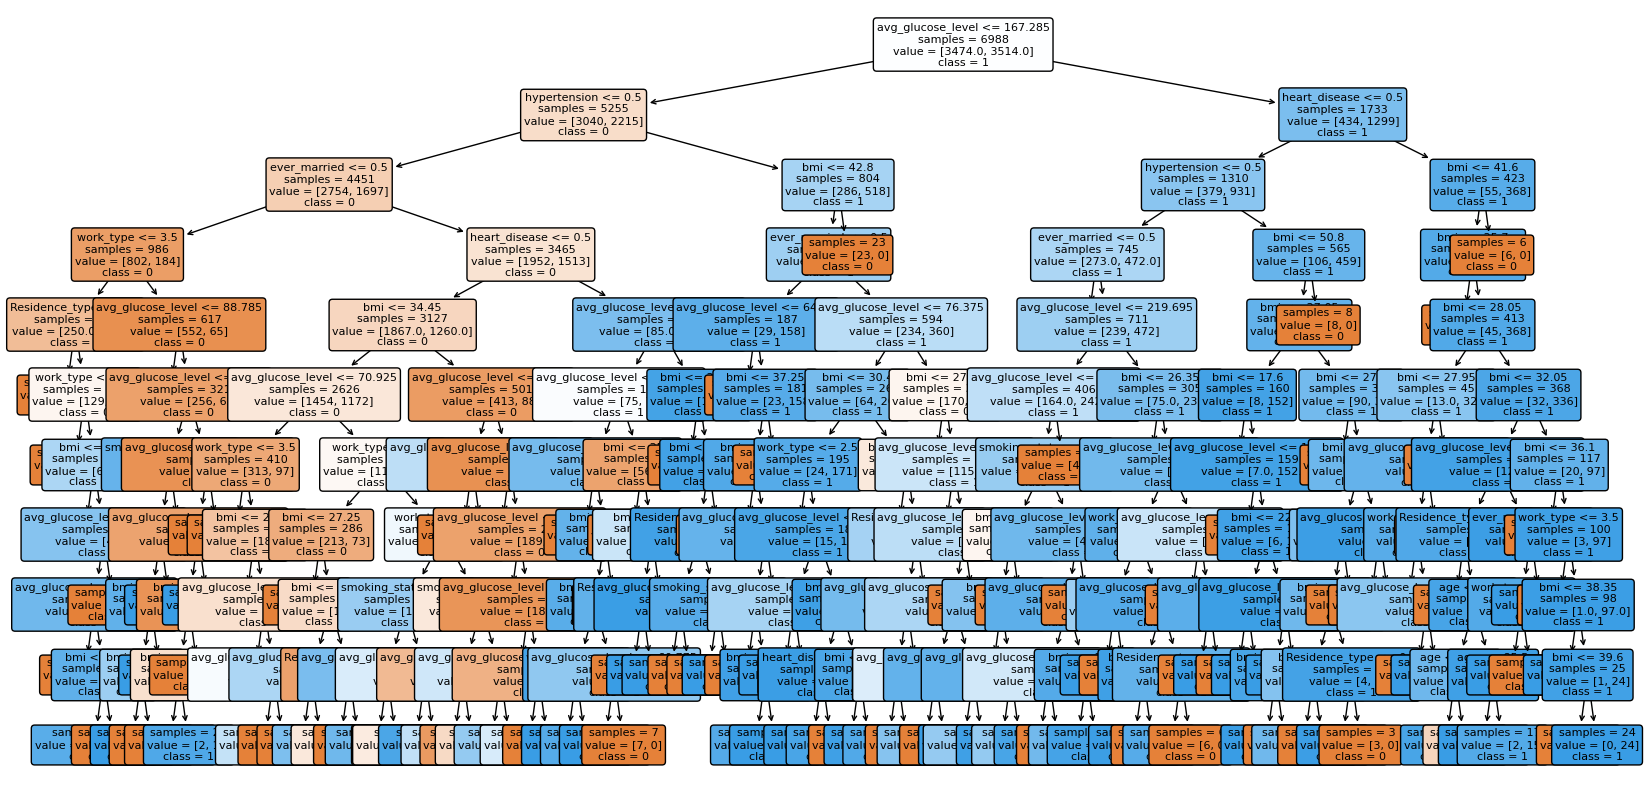

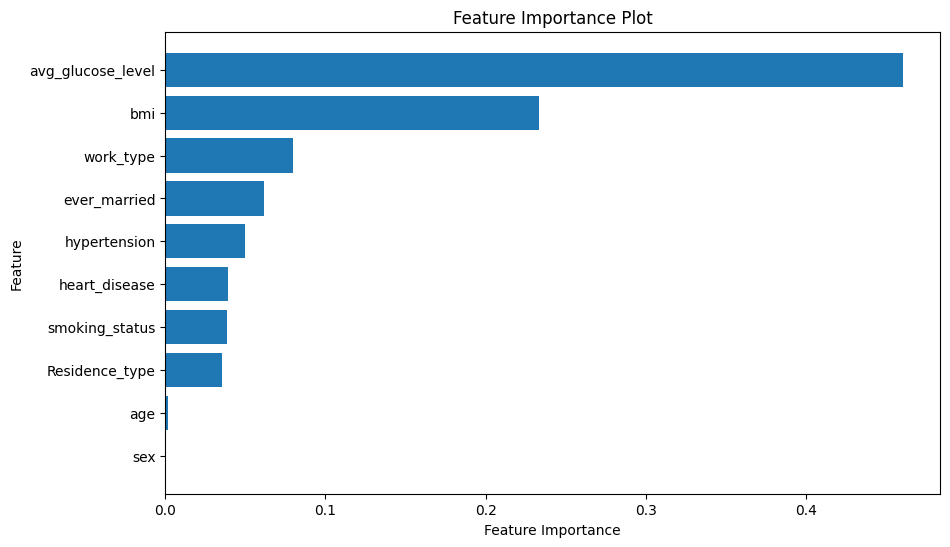

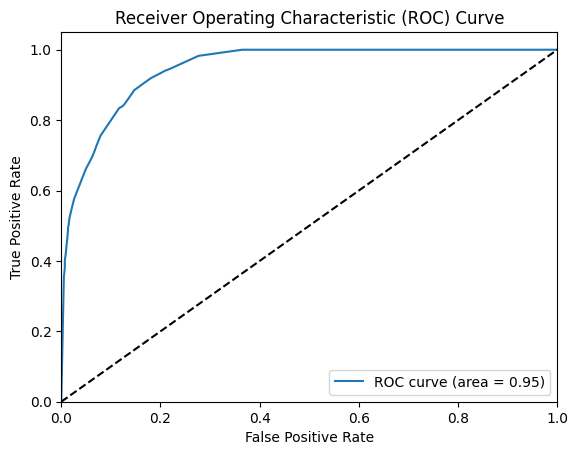

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9467226842033668
Accuracy for each fold: [0.82, 0.7766666666666666, 0.8133333333333334, 0.7633333333333333, 0.79, 0.7966666666666666, 0.7926421404682275, 0.822742474916388, 0.8160535117056856, 0.822742474916388]
Mean accuracy: 0.801418060200669
95% confidence interval: (0.7865191556495679, 0.8163169647517701)


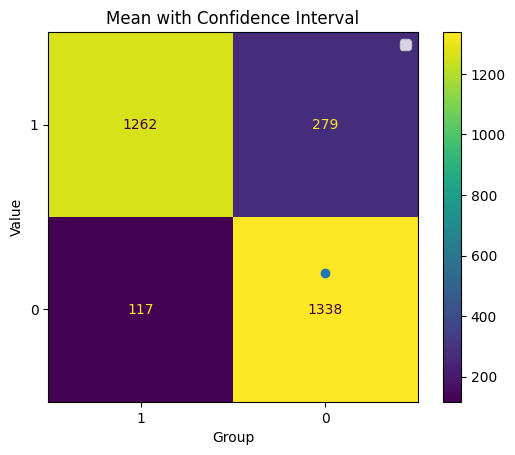

In [10]:
y_prob, y_test, decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.77      0.71      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



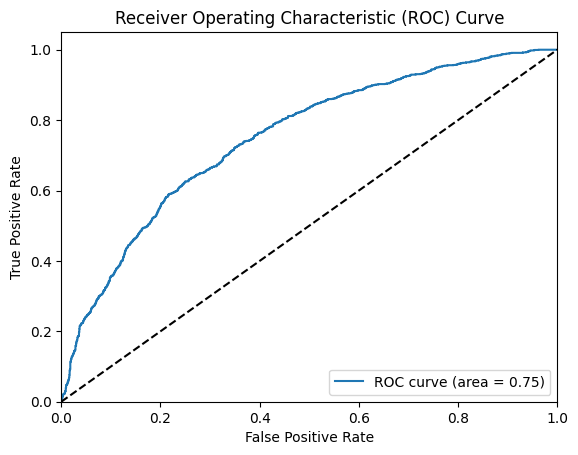

AUC Score: 0.748566446119916


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6666666666666666, 0.64, 0.6666666666666666, 0.7, 0.6533333333333333, 0.6733333333333333, 0.6588628762541806, 0.6287625418060201, 0.7157190635451505, 0.6755852842809364]
Mean accuracy: 0.6678929765886287
95% confidence interval: (0.6494029919447605, 0.6863829612324969)


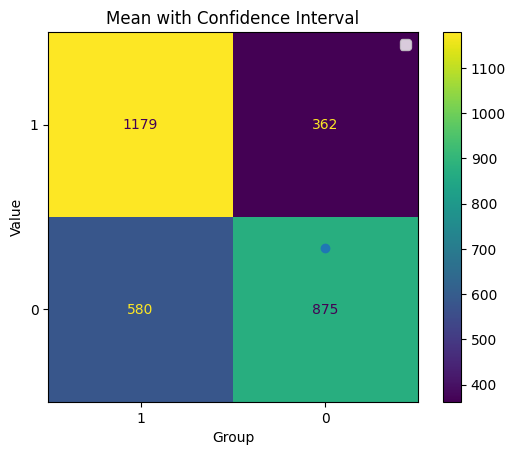

--------------------------------------


In [11]:
y_prob, y_test, svm = ML_algorithms.model_svm(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 10)

Outliers found:


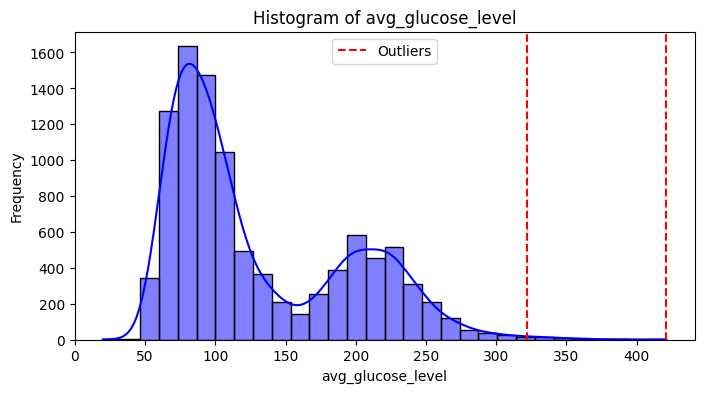

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1541
           1       0.83      0.91      0.87      1455

    accuracy                           0.86      2996
   macro avg       0.87      0.87      0.86      2996
weighted avg       0.87      0.86      0.86      2996

Node Labels:
 Annotation(0.657141, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3475, 3513]\nclass = 1')


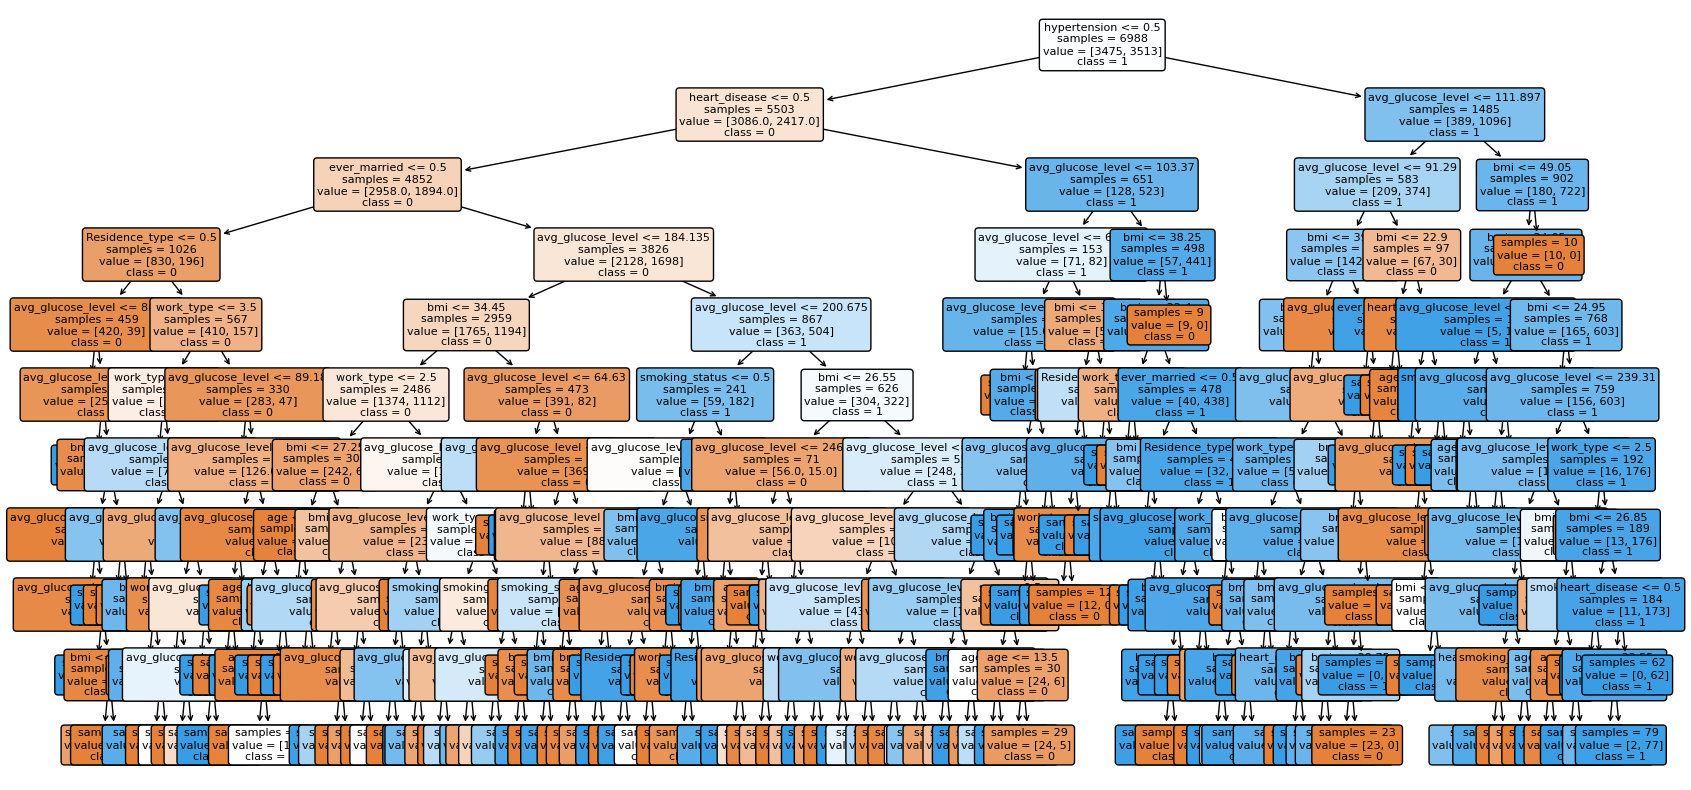

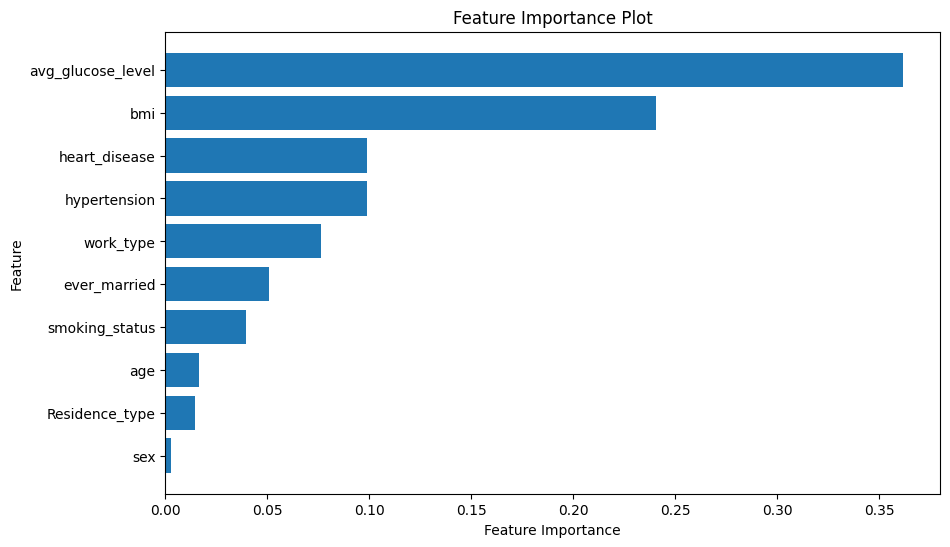

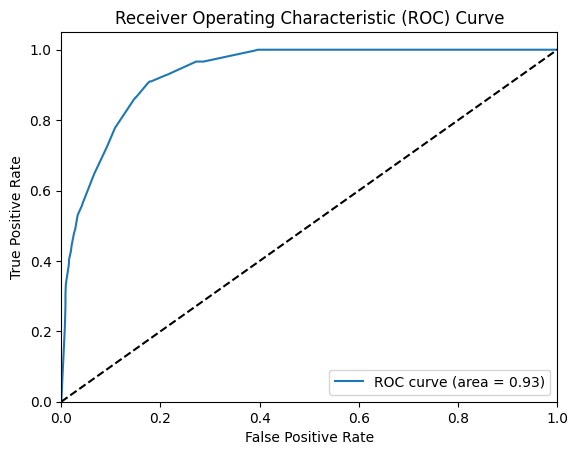

AUC Score: 0.9339659836184386


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7866666666666666, 0.74, 0.8266666666666667, 0.7833333333333333, 0.78, 0.85, 0.8361204013377926, 0.8060200668896321, 0.842809364548495, 0.7759197324414716]
Mean accuracy: 0.8027536231884058
95% confidence interval: (0.7773561941691927, 0.828151052207619)


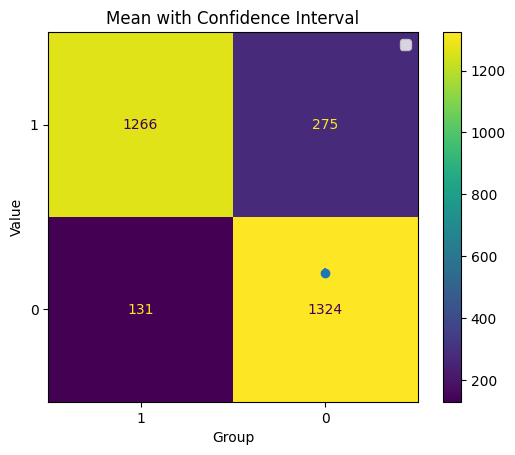

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)


**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



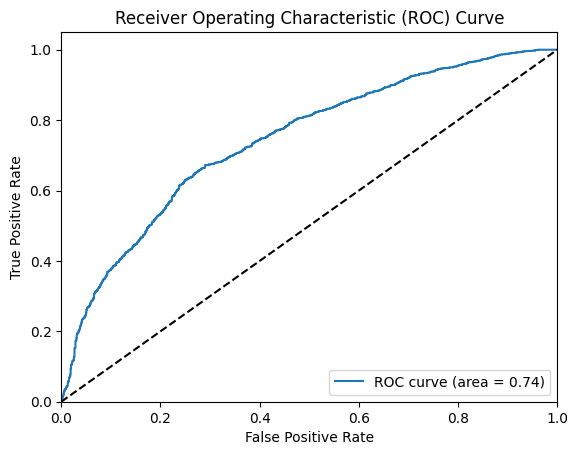

AUC Score: 0.7418104457541963


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6766666666666666, 0.6466666666666666, 0.5966666666666667, 0.6866666666666666, 0.6766666666666666, 0.7066666666666667, 0.7123745819397993, 0.7023411371237458, 0.7290969899665551, 0.6287625418060201]
Mean accuracy: 0.676257525083612
95% confidence interval: (0.6467854536795862, 0.7057295964876379)


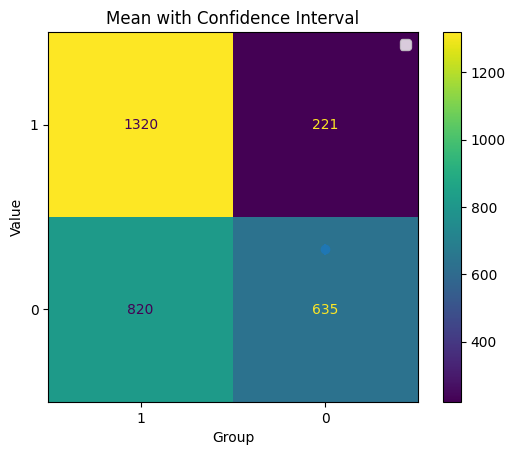

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

Outliers found:


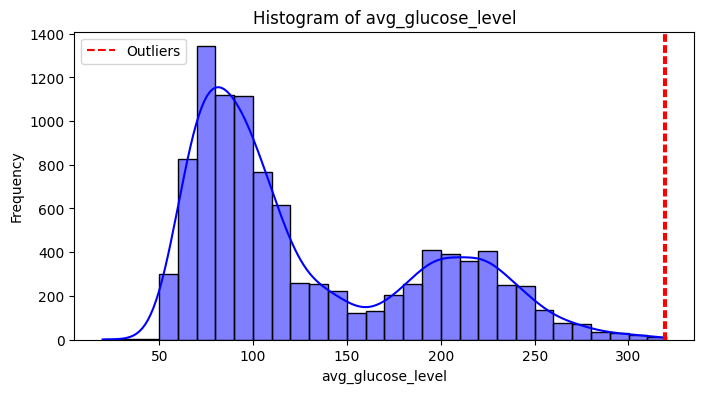

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1541
           1       0.82      0.91      0.87      1455

    accuracy                           0.86      2996
   macro avg       0.87      0.87      0.86      2996
weighted avg       0.87      0.86      0.86      2996

Node Labels:
 Annotation(0.647502, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3475, 3513]\nclass = 1')


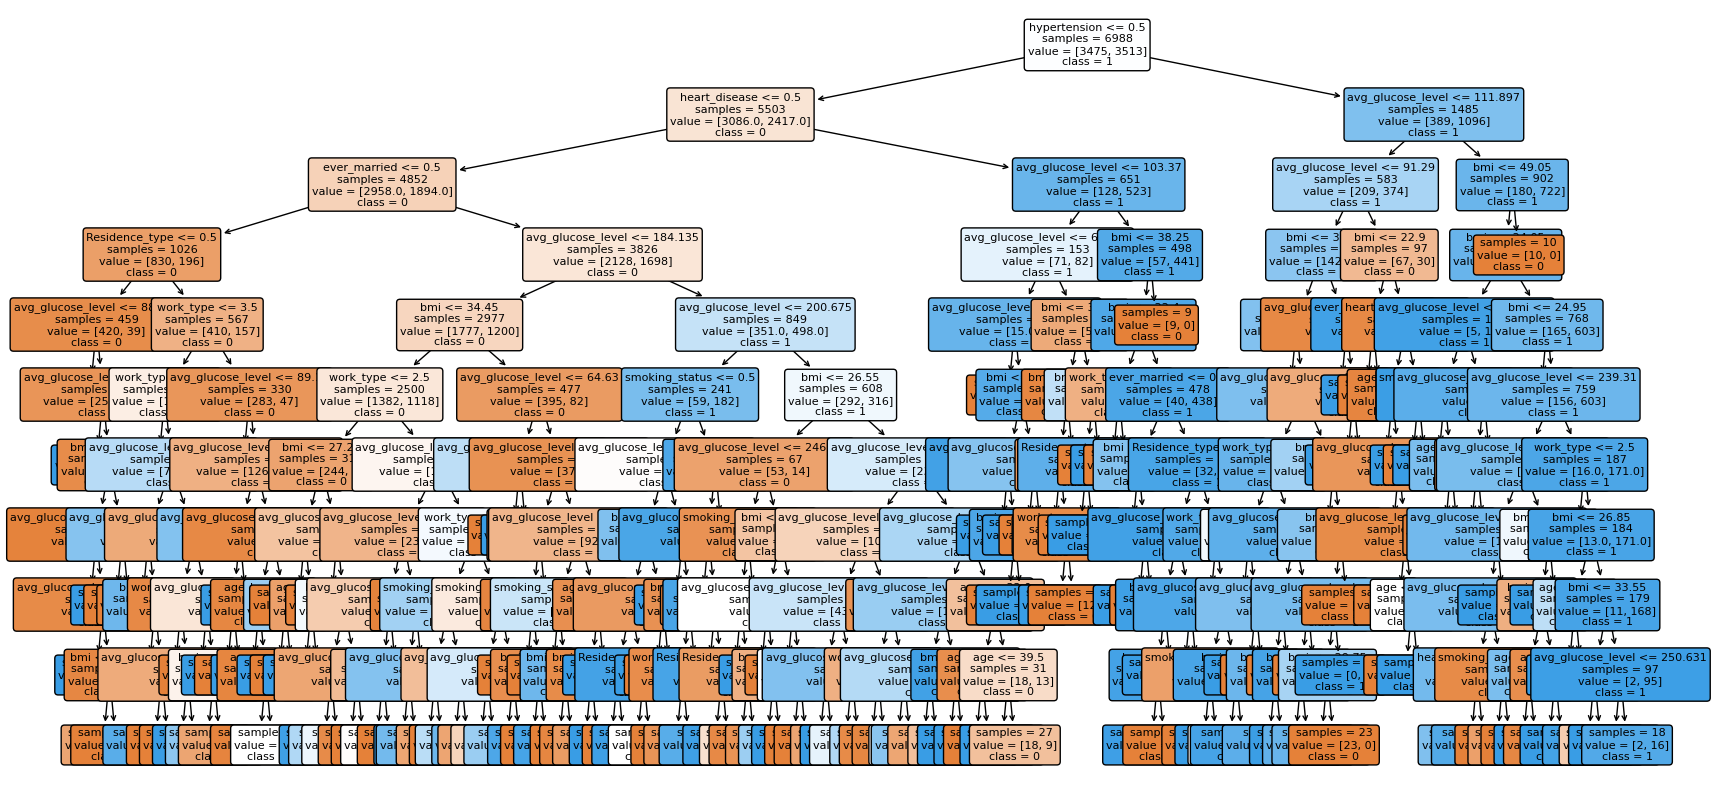

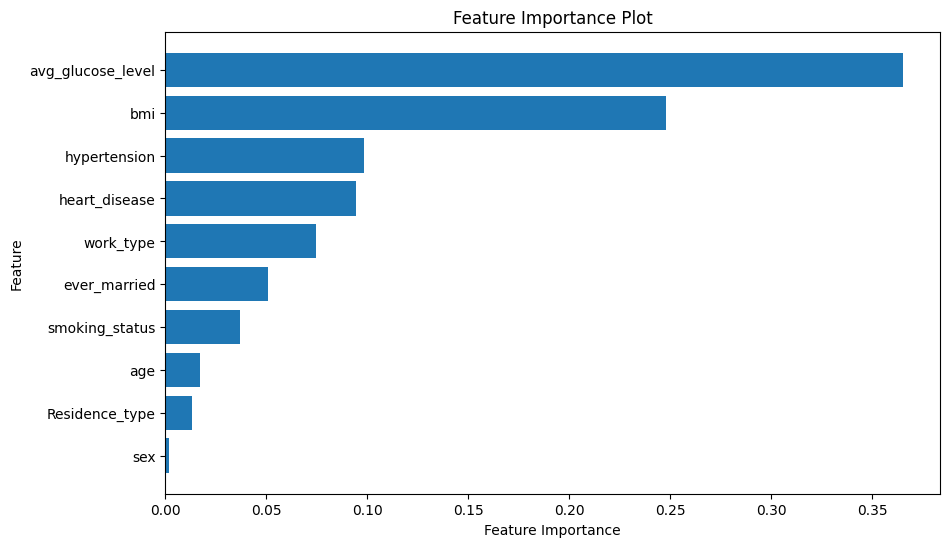

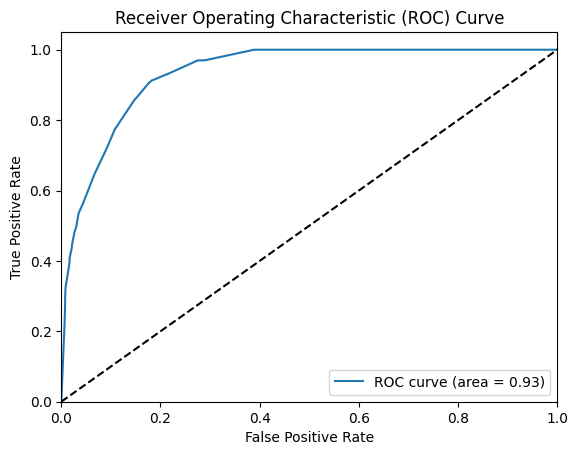

AUC Score: 0.9340493855241943


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7766666666666666, 0.8433333333333334, 0.8333333333333334, 0.7566666666666667, 0.84, 0.7433333333333333, 0.7993311036789298, 0.8060200668896321, 0.7491638795986622, 0.7692307692307693]
Mean accuracy: 0.7917079152731327
95% confidence interval: (0.7644133218762879, 0.8190025086699775)


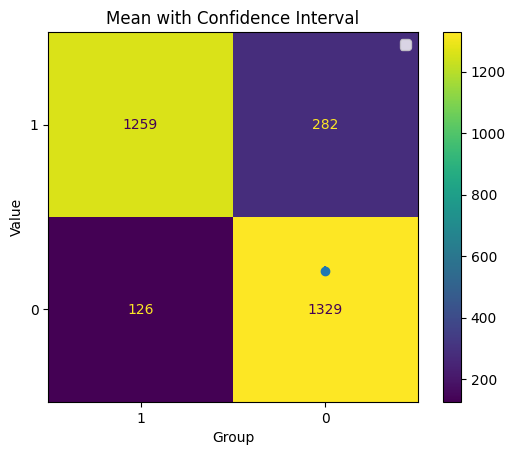

In [20]:
y_prob, y_test, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



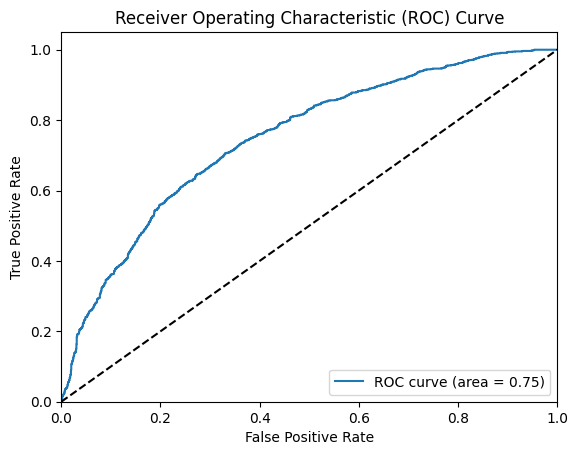

AUC Score: 0.7473386095073712


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6966666666666667, 0.7, 0.6233333333333333, 0.65, 0.62, 0.66, 0.705685618729097, 0.6187290969899666, 0.6889632107023411, 0.7357859531772575]
Mean accuracy: 0.6699163879598663
95% confidence interval: (0.6403460114838136, 0.699486764435919)


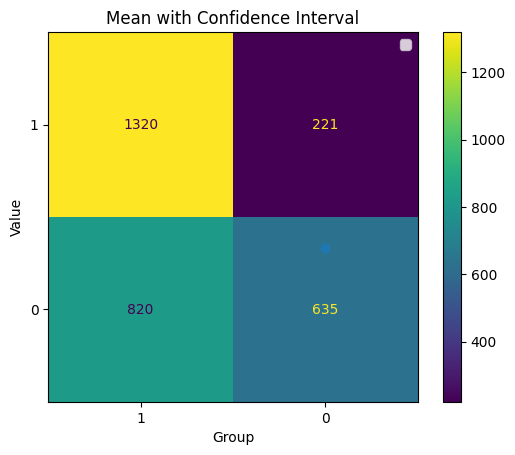

--------------------------------------


In [21]:
y_prob, y_test, svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


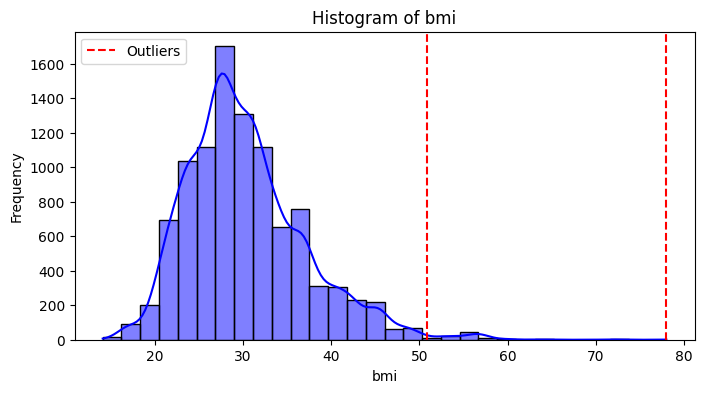

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 10)

Outliers found:


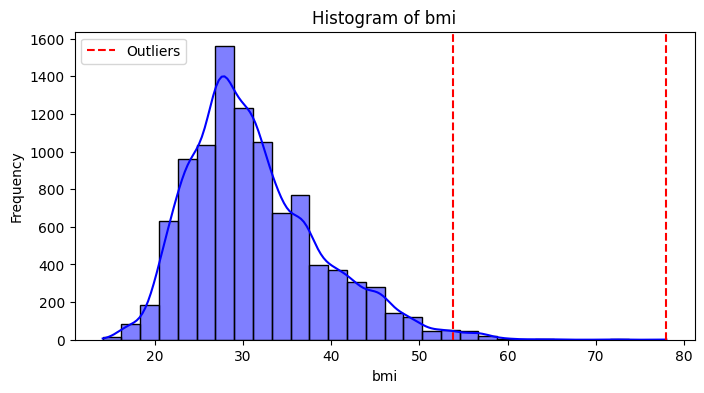

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1541
           1       0.80      0.93      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.86      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.592367, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3476, 3512]\nclass = 1')


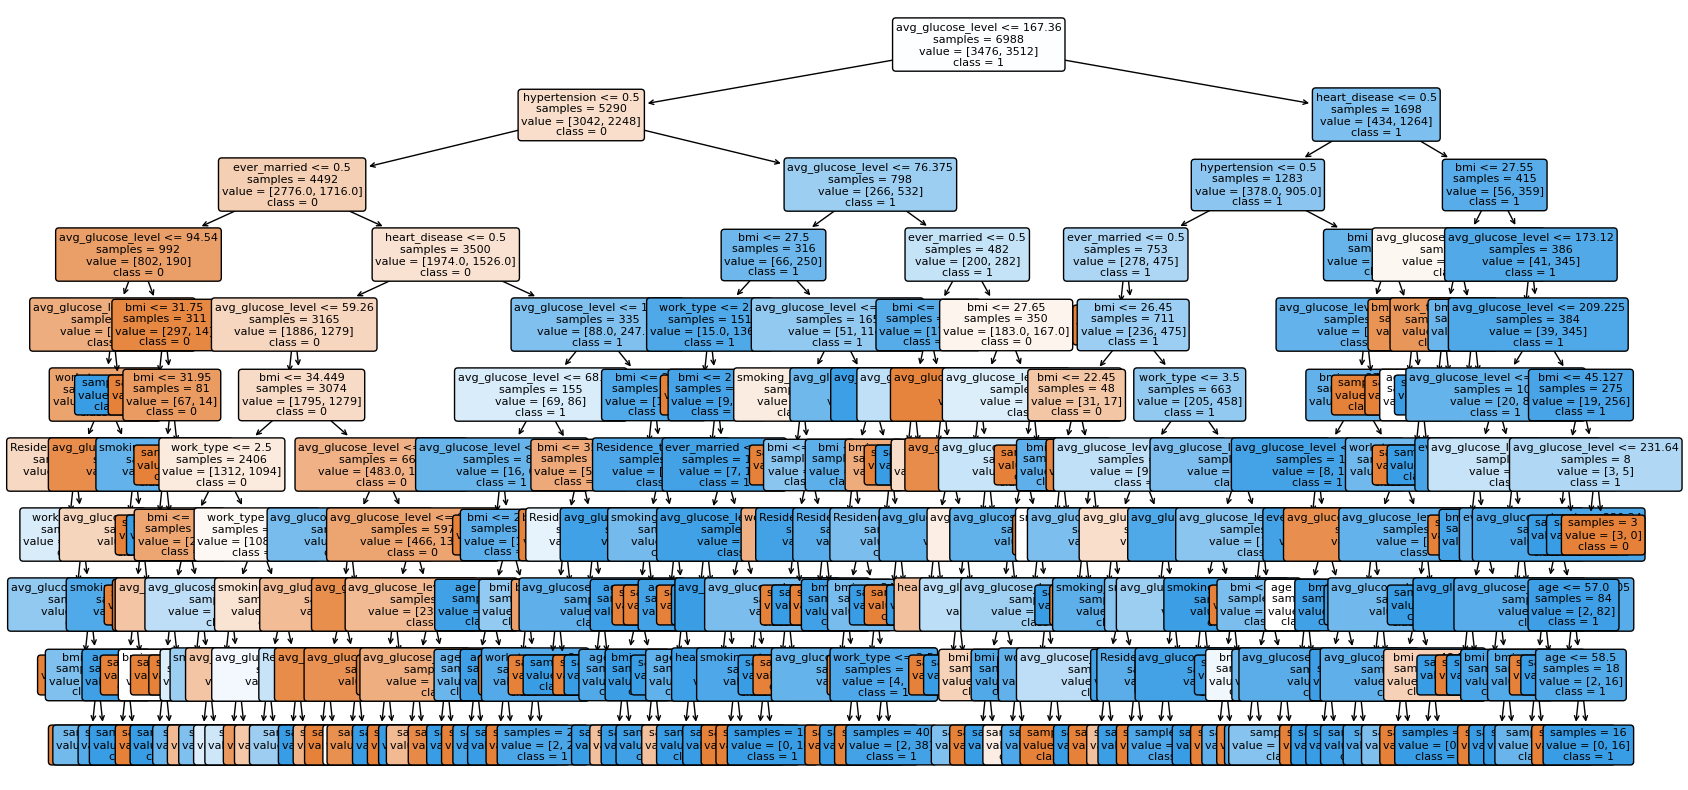

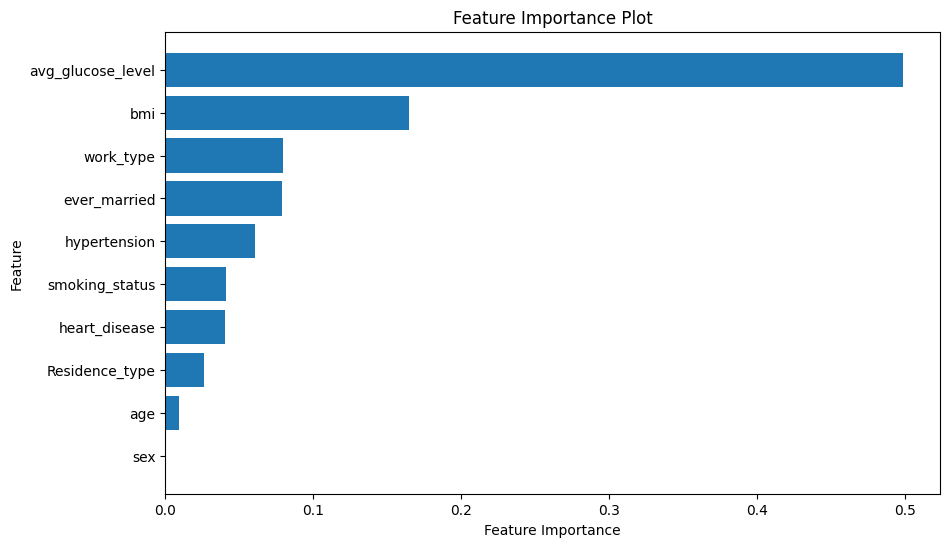

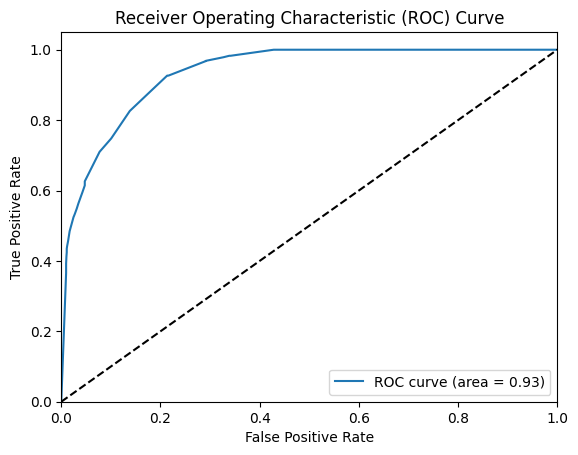

AUC Score: 0.9347632077175753


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7766666666666666, 0.8366666666666667, 0.7933333333333333, 0.7933333333333333, 0.7866666666666666, 0.7733333333333333, 0.8160535117056856, 0.7926421404682275, 0.8294314381270903, 0.8160535117056856]
Mean accuracy: 0.801418060200669
95% confidence interval: (0.7858138467874525, 0.8170222736138855)


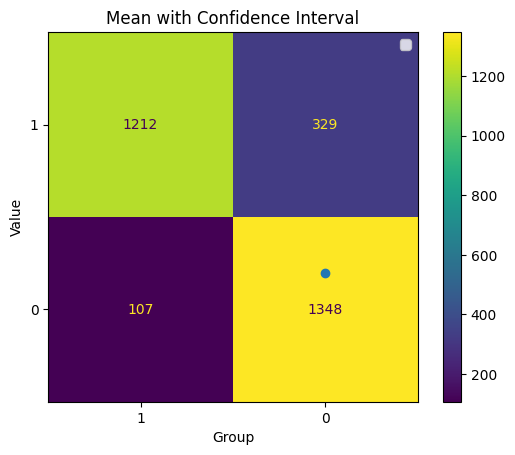

In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



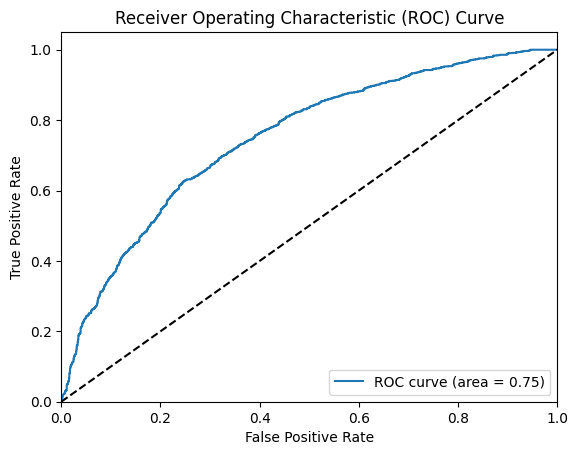

AUC Score: 0.7479371408310309


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.67, 0.68, 0.6733333333333333, 0.73, 0.63, 0.67, 0.6020066889632107, 0.6622073578595318, 0.6254180602006689, 0.7324414715719063]
Mean accuracy: 0.6675406911928652
95% confidence interval: (0.6375478544239044, 0.697533527961826)


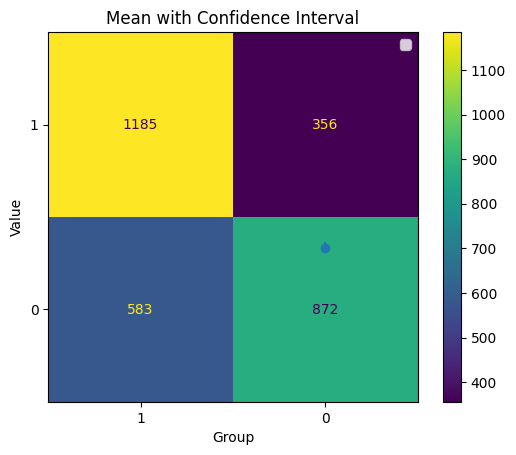

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

Outliers found:


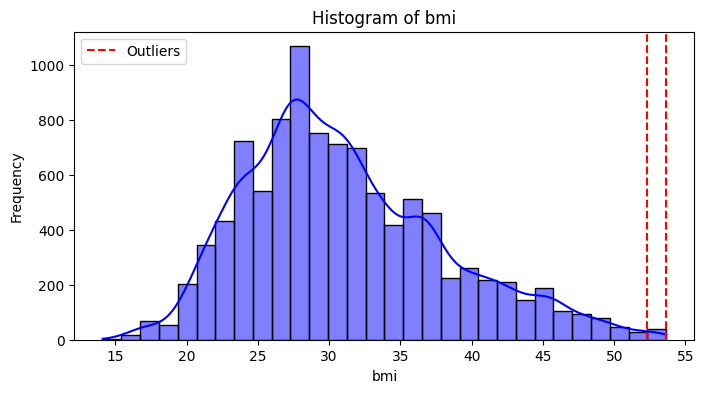

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1541
           1       0.80      0.92      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.619727, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3476, 3512]\nclass = 1')


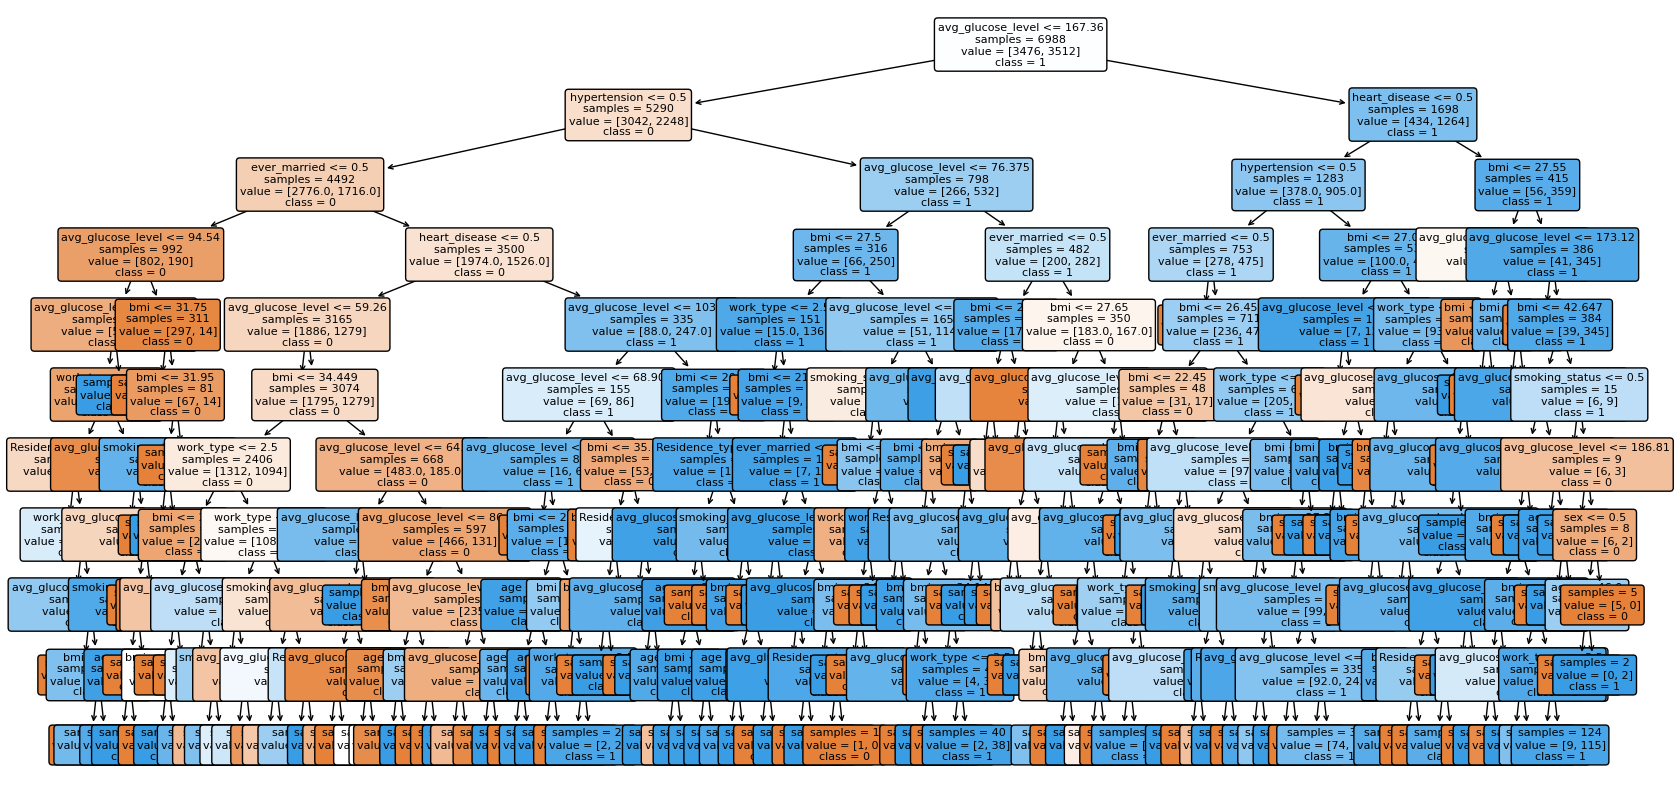

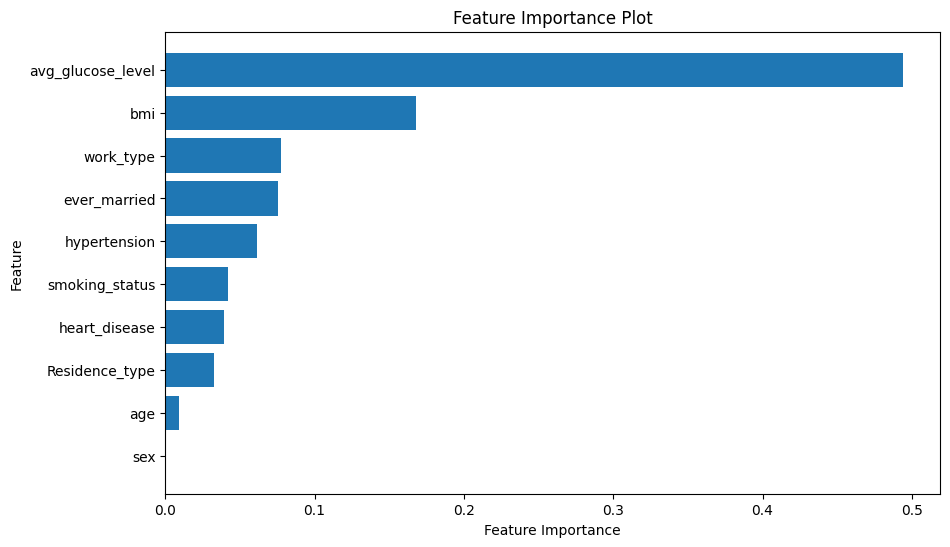

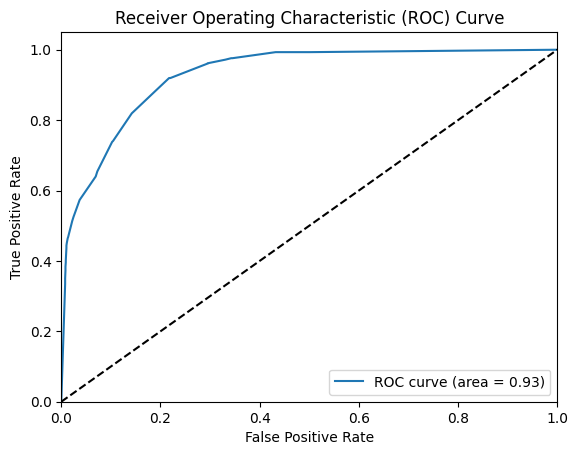

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9276905477096811
Accuracy for each fold: [0.8033333333333333, 0.8366666666666667, 0.7666666666666667, 0.81, 0.7866666666666666, 0.8066666666666666, 0.8595317725752508, 0.822742474916388, 0.8394648829431438, 0.802675585284281]
Mean accuracy: 0.8134414715719064
95% confidence interval: (0.7940577117181333, 0.8328252314256794)


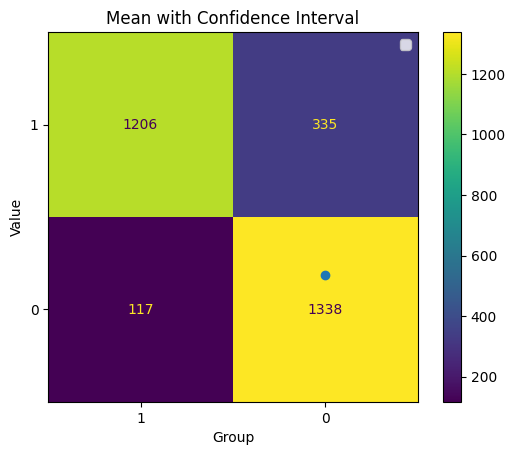

In [30]:
y_prob, y_test, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



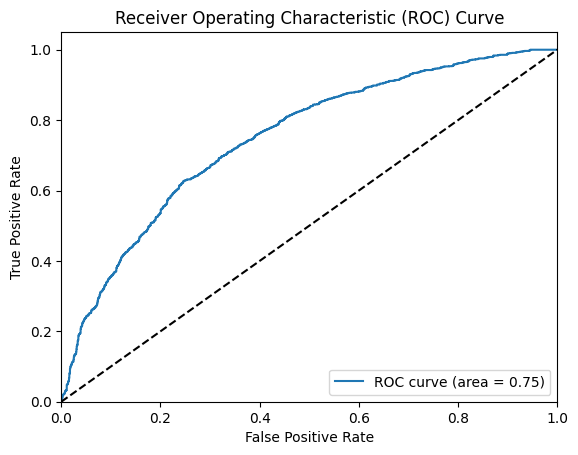

AUC Score: 0.7479308968380866


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6933333333333334, 0.6966666666666667, 0.6566666666666666, 0.6766666666666666, 0.65, 0.6866666666666666, 0.6287625418060201, 0.6488294314381271, 0.7157190635451505, 0.6354515050167224]
Mean accuracy: 0.668876254180602
95% confidence interval: (0.6481220259011655, 0.6896304824600386)


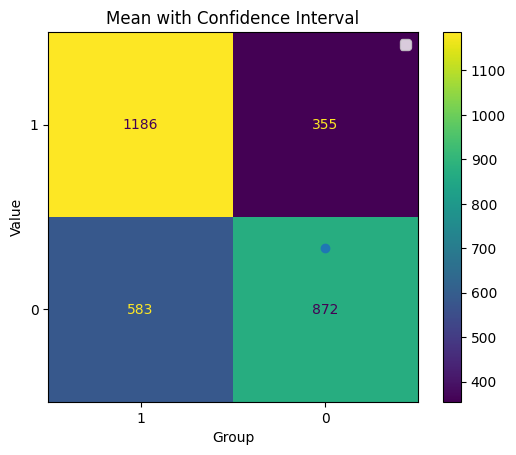

--------------------------------------


In [31]:
y_prob, y_test, svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## Categorical

In [32]:
df = df_original.copy()

Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


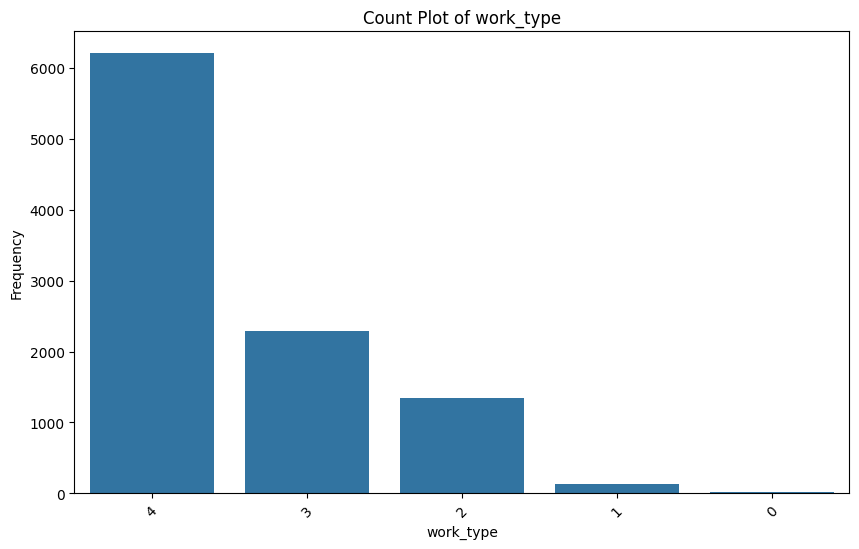

In [33]:
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 10, df)

Valore meno frequente:  0


Value counts:
work_type
4    5561
3    2076
2    1210
0    1020
1     117
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 0, 1]
Outliers found:


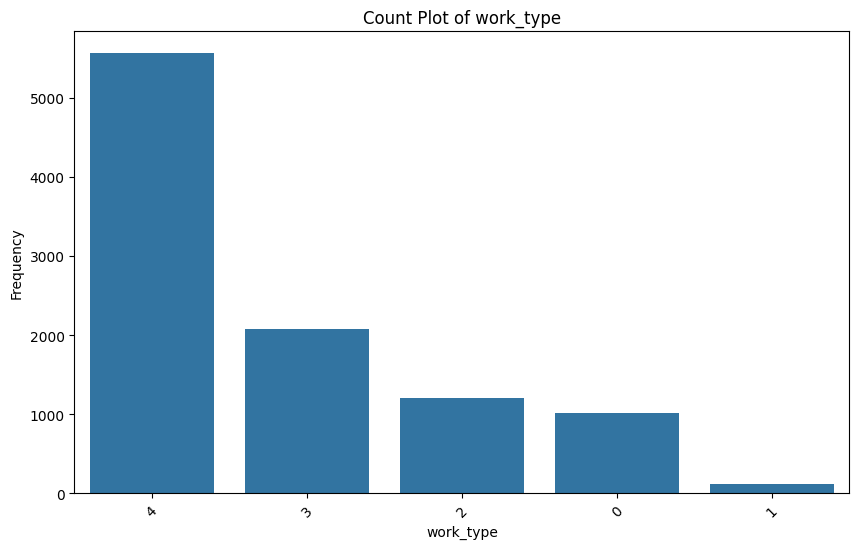

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1541
           1       0.78      0.96      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.84      2996
weighted avg       0.87      0.85      0.84      2996

Node Labels:
 Annotation(0.611206, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


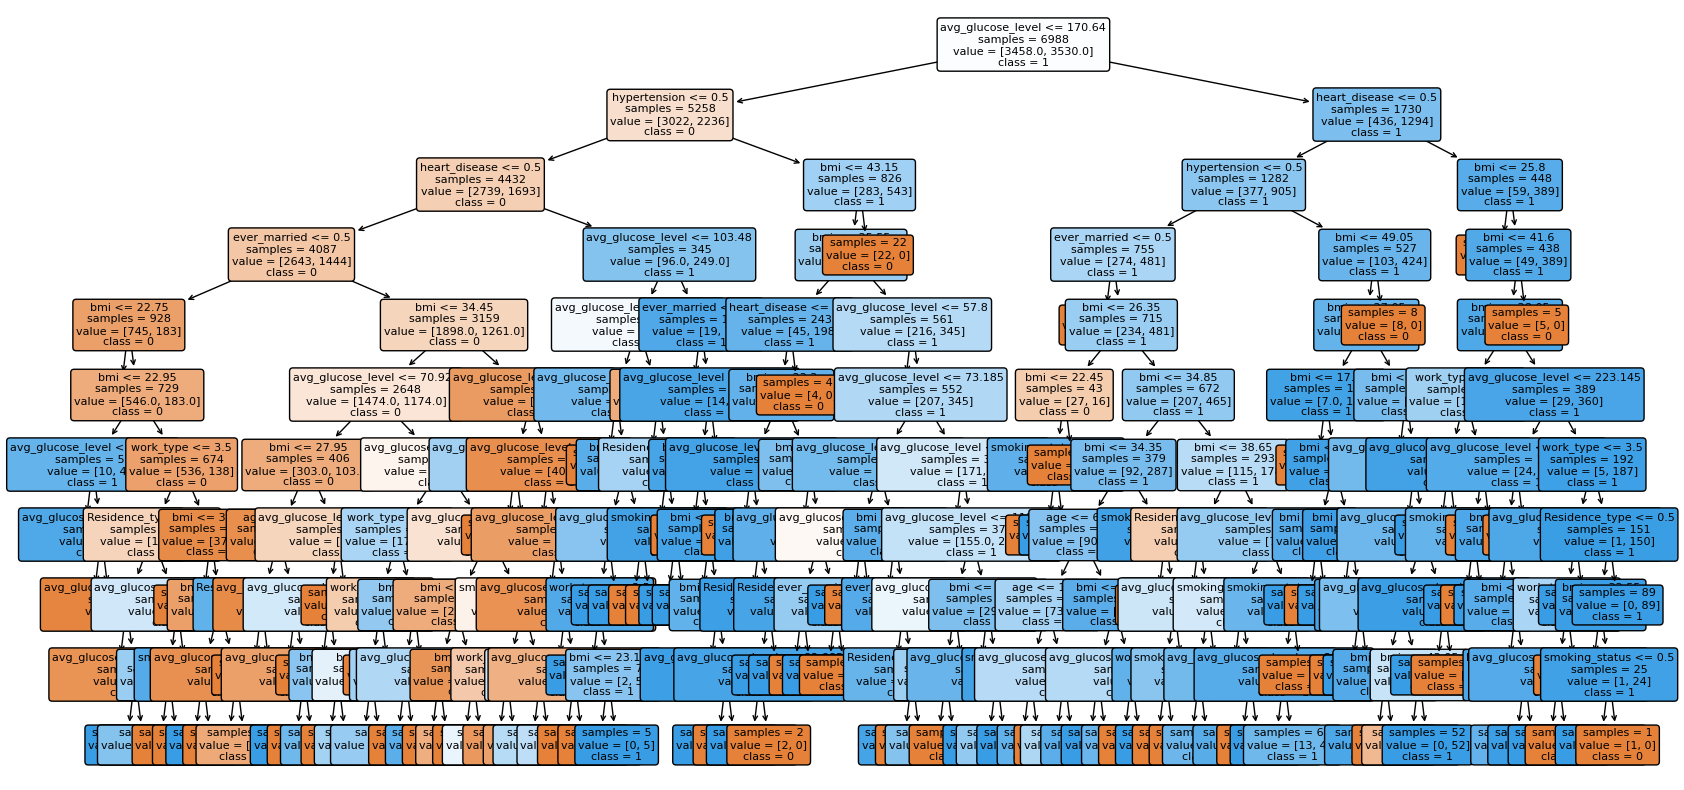

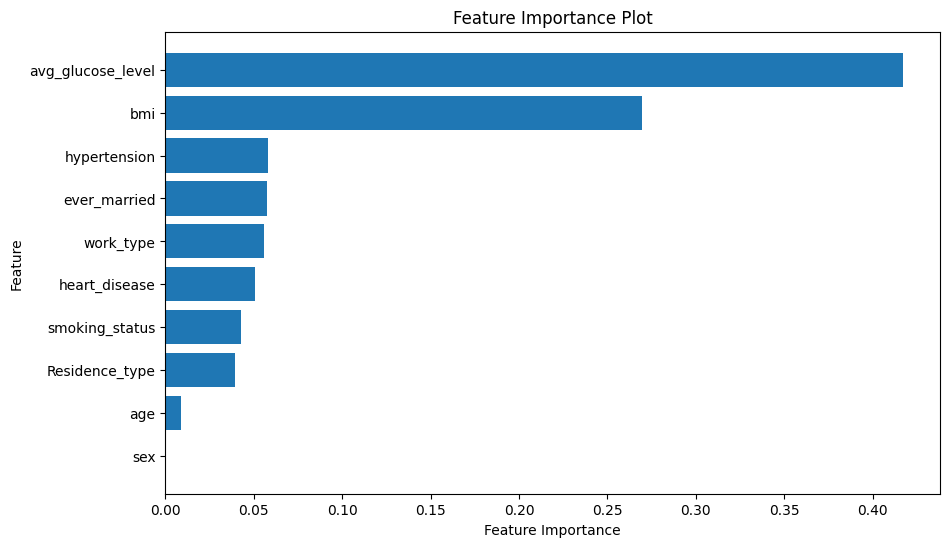

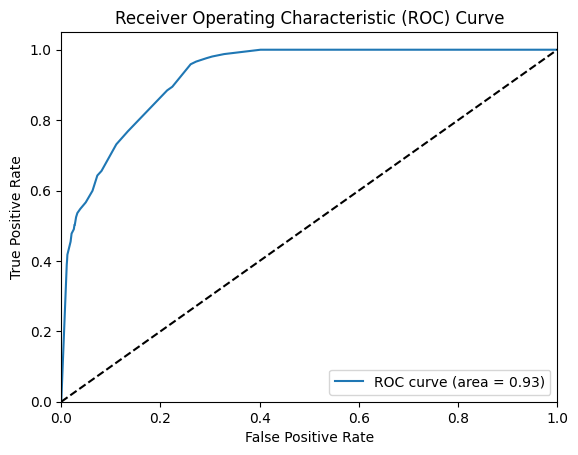

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.925260965455109
Accuracy for each fold: [0.7833333333333333, 0.7766666666666666, 0.79, 0.8166666666666667, 0.7966666666666666, 0.81, 0.7859531772575251, 0.7926421404682275, 0.782608695652174, 0.7993311036789298]
Mean accuracy: 0.793386845039019
95% confidence interval: (0.7843755904449422, 0.8023980996330958)


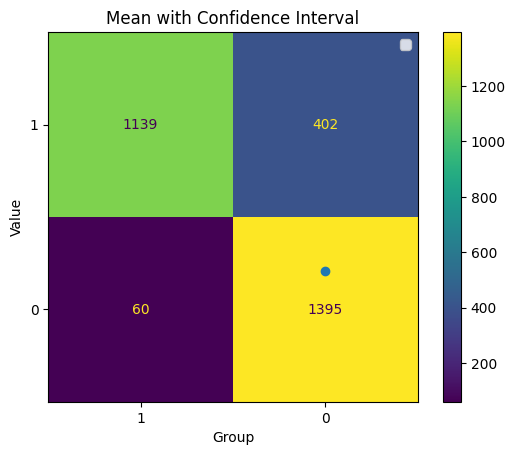

In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1541
           1       0.71      0.59      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



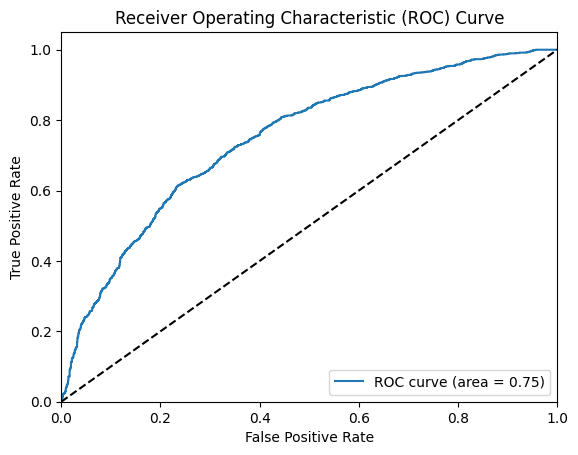

AUC Score: 0.7489152177258039


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6733333333333333, 0.62, 0.66, 0.6733333333333333, 0.66, 0.7266666666666667, 0.6321070234113713, 0.6722408026755853, 0.6555183946488294, 0.6989966555183946]
Mean accuracy: 0.6672196209587515
95% confidence interval: (0.6454335740699324, 0.6890056678475707)


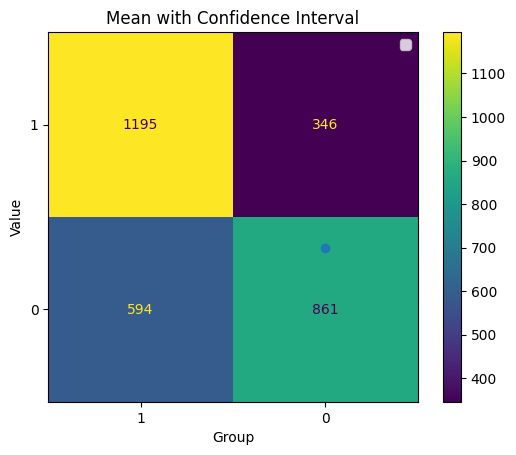

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, svm = ML_algorithms.model_svm(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

print('--------------------------------------')

## Conclusion

### ROC_Curve

#### Decision Tree

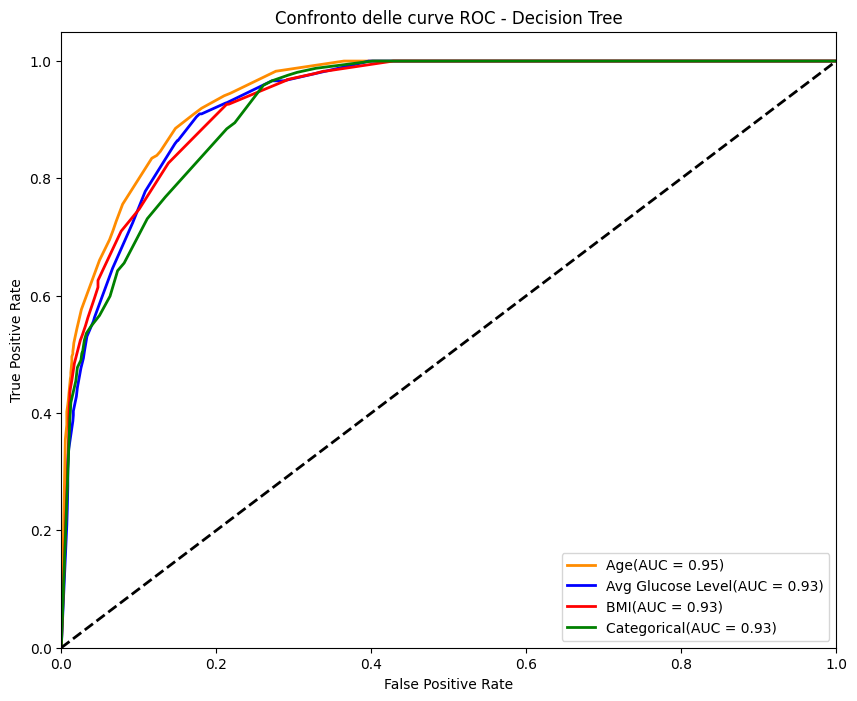

In [38]:
ML_algorithms.plot_roc_curve_conlusion_dt(y_pred_prob_age_dt, y_test_age_dt, y_pred_prob_glucose_dt, y_test_glucose_dt,
                                          y_pred_prob_bmi_dt, y_test_bmi_dt,  y_pred_prob_categorical_dt, y_test_categorical_dt)

#### Support Vector Machine

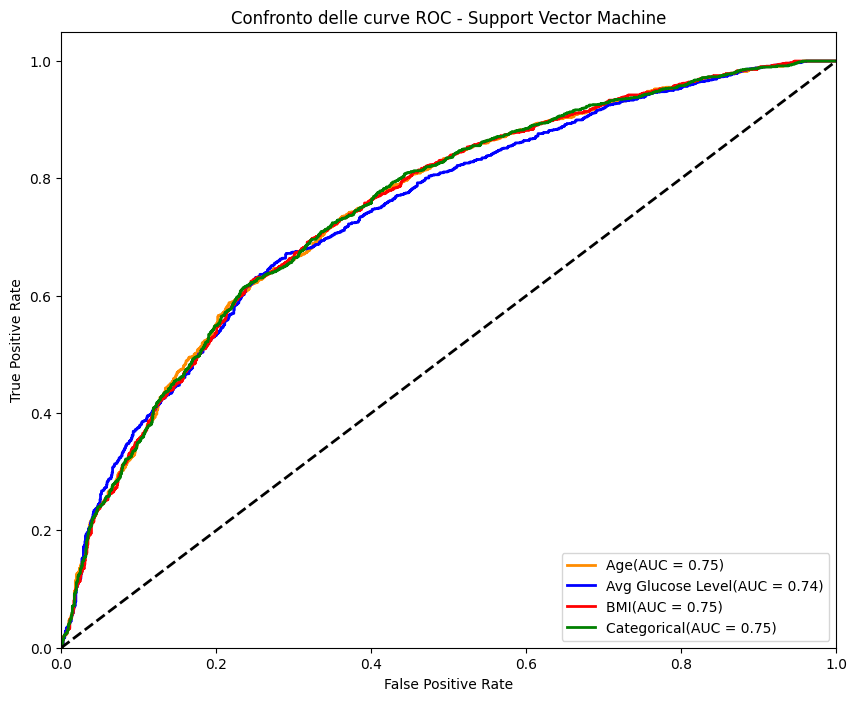

In [39]:
ML_algorithms.plot_roc_curve_conlusion_svm(y_pred_prob_age_svm, y_test_age_svm, y_pred_prob_glucose_svm, y_test_glucose_svm,
                                          y_pred_prob_bmi_svm, y_test_bmi_svm,  y_pred_prob_categorical_svm, y_test_categorical_svm)